## Simple multilayer perceptrone with pytorch

In [5]:
#Imports
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

#### We will use popular [MNIST](https://www.kaggle.com/competitions/digit-recognizer/data) dataset

Text(0.5, 1.0, 'Image label: 2')

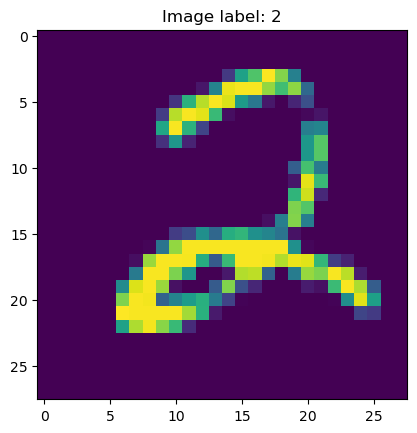

In [6]:
# loading and preparing data
train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')

#### Building model

In [7]:
class MLP(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
                     nn.Linear(28*28, 512),
                     nn.ReLU(),
                     nn.Linear(512, 512),
                     nn.ReLU(),
                     nn.Linear(512, 1024),
                     nn.ReLU(),
                     nn.Linear(1024, 10))
    
    def forward(self, x):
        x = self.flatten(x)
        return self.model(x)

#### Agnostic code to check if cuda is available

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [9]:
# Creating model instance
model = MLP().to(device)

#Creating loss function and optimizer
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

#number of epochs
epochs = 10

#Training process
for epoch in range(epochs):
    for images, labels in train_data_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss_fn = loss(outputs, labels)
        optimizer.zero_grad()
        loss_fn.backward()
        optimizer.step()

#### local tests to check model

In [15]:
try:
    x = random_batch[0].reshape(-1, 784).to(device)
    y = random_batch[1].to(device)

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')

Everything seems fine!


#### Check accuracy on train and test

In [16]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784).to(device))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1].to(device))

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [17]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.99112


In [18]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784).to(device))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1].to(device))

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [19]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9762
